In [63]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import copy
import seaborn as sns
import time
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

In [64]:
data = pd.read_csv('Cardiotocography.csv')

In [65]:
data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120,0.000,0.000,0.000,0.000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.000,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.000,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.000,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.000,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140,0.000,0.000,0.007,0.000,0.0,0.0,79,0.2,25,...,137,177,4,0,153,150,152,2,0,2
2122,140,0.001,0.000,0.007,0.000,0.0,0.0,78,0.4,22,...,103,169,6,0,152,148,151,3,1,2
2123,140,0.001,0.000,0.007,0.000,0.0,0.0,79,0.4,20,...,103,170,5,0,153,148,152,4,1,2
2124,140,0.001,0.000,0.006,0.000,0.0,0.0,78,0.4,27,...,103,169,6,0,152,147,151,4,1,2


In [66]:
data.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
NSP         0
dtype: int64

In [67]:
X = data.iloc[:,:-1].values
Y = data.iloc[:, -1].values

In [68]:
#Splitting data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =  train_test_split(X,Y,test_size=0.3,random_state=0)

In [69]:
# Funtion to Implement SVM Classification
def SVM_Classification(kernel="rbf",probability=False):
    
    start_time = time.time()
    
    from sklearn.svm import SVC
    classifier = SVC(kernel=kernel,random_state=0,probability=probability)
    classifier.fit(X_train,Y_train)
    print("--- %s seconds ---" % (time.time() - start_time))
    
    #Predicting for test data
    Y_pred = classifier.predict(X_test)
    
    
    #Confusion Matrix
    cm=np.array(confusion_matrix(Y_test,Y_pred,labels=[0,1]))
    confusion = pd.DataFrame(cm, index=['Actual 0','Actual 1'],columns=['predicted as 0','predicted as 1'])
    #sns.heatmap(confusion, annot=True,fmt="d",cmap="YlGnBu")
    #plt.title("Confusion Matrix", fontsize = 20)
    acc=accuracy_score(Y_test,Y_pred)
    print("Accuracy of SVM Classification with ",kernel," kernel : ",acc)
    print("Error rate of SVM Classification with ",kernel," kernel : ",1-acc)

In [70]:
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
kernel_list=['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernel_list:
    SVM_Classification(kernel)
    

--- 1.6308398246765137 seconds ---
Accuracy of SVM Classification with  linear  kernel :  0.877742946708464
Error rate of SVM Classification with  linear  kernel :  0.12225705329153602
--- 0.02553391456604004 seconds ---
Accuracy of SVM Classification with  poly  kernel :  0.8605015673981191
Error rate of SVM Classification with  poly  kernel :  0.13949843260188088
--- 0.03492093086242676 seconds ---
Accuracy of SVM Classification with  rbf  kernel :  0.8385579937304075
Error rate of SVM Classification with  rbf  kernel :  0.1614420062695925
--- 0.04522275924682617 seconds ---
Accuracy of SVM Classification with  sigmoid  kernel :  0.731974921630094
Error rate of SVM Classification with  sigmoid  kernel :  0.26802507836990597


In [71]:
#Feature Scaling
# Applying Feature Scaling for Features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) #applying on all features
X_test = sc.transform(X_test)

In [72]:
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
kernel_list=['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernel_list:
    SVM_Classification(kernel)

--- 0.048063039779663086 seconds ---
Accuracy of SVM Classification with  linear  kernel :  0.8996865203761756
Error rate of SVM Classification with  linear  kernel :  0.10031347962382442
--- 0.03153681755065918 seconds ---
Accuracy of SVM Classification with  poly  kernel :  0.9043887147335423
Error rate of SVM Classification with  poly  kernel :  0.09561128526645768
--- 0.04305315017700195 seconds ---
Accuracy of SVM Classification with  rbf  kernel :  0.9075235109717869
Error rate of SVM Classification with  rbf  kernel :  0.09247648902821315
--- 0.05068802833557129 seconds ---
Accuracy of SVM Classification with  sigmoid  kernel :  0.7884012539184952
Error rate of SVM Classification with  sigmoid  kernel :  0.21159874608150475


In [77]:
# Binarize the output
y = label_binarize(Y, classes=[1,2,3])
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

# SVM

In [78]:
# Funtion to Implement SVM Classification
def SVM_Classification2(kernel="rbf",probability=True,degree=3,C=1):
    
    start_time = time.time()
    
    classifier = OneVsRestClassifier(SVC(kernel=kernel,random_state=0,probability=True,degree=degree,C=C))
    
    #Predicting for test data
    Y_pred = classifier.fit(X_train, Y_train).predict(X_test)
    
    #Predicting for ROC curve
    y_pred = classifier.fit(X_train, y_train).decision_function(X_test)
    

    
    t = (time.time() - start_time)
    
    #Confusion Matrix
    cm=np.array(confusion_matrix(Y_test,Y_pred,labels=[1,2,3]))
    confusion = pd.DataFrame(cm, index=['Actual-Normal','Actual-Suspect','Actual-Pathalogic'],columns=['Predicted-Normal','Predicted-Suspect','Predicted-Pathalogic'])
    #sns.heatmap(confusion, annot=True,fmt="d",cmap="YlGnBu")
    #plt.title("Confusion Matrix", fontsize = 20)
    
    acc=accuracy_score(Y_test,Y_pred)
    print("Accuracy of SVM Classification with ",kernel," kernel : ",acc)
    
    print("--- %s seconds ---" % (time.time() - start_time))
    

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


    return fpr["micro"], tpr["micro"], roc_auc["micro"], acc, t

In [79]:
fpr, tpr, roc_auc,acc,t= SVM_Classification2('linear')

Accuracy of SVM Classification with  linear  kernel :  0.8730407523510971
--- 47.53252720832825 seconds ---


# SVM with Default Params

Accuracy of SVM Classification with  linear  kernel :  0.8730407523510971
--- 47.98329782485962 seconds ---
Accuracy of SVM Classification with  poly  kernel :  0.8448275862068966
--- 0.6992919445037842 seconds ---
Accuracy of SVM Classification with  rbf  kernel :  0.8369905956112853
--- 0.8295083045959473 seconds ---


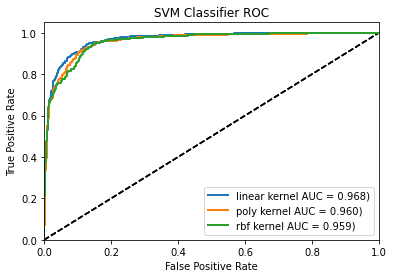

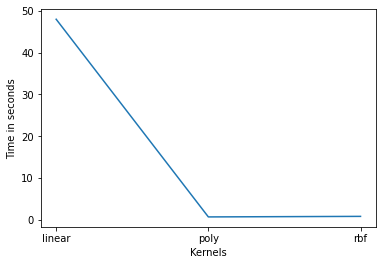

In [80]:
kernel_list=['linear', 'poly', 'rbf']
time_list=[]
for kernel in kernel_list:
    fpr, tpr, roc_auc,acc,t= SVM_Classification2(kernel)
    time_list.append(t)
    #GRAPH DATA
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1],linestyle='--',color='black')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('SVM Classifier ROC')
    plt.plot(fpr, tpr, lw=2, label=kernel+' kernel AUC = %0.3f)'%roc_auc)
    plt.legend()

plt.show()

plt.plot(kernel_list,time_list)
plt.xlabel("Kernels")
plt.ylabel("Time in seconds")
plt.show()

# SVM with Linear Kernel

Accuracy of SVM Classification with  linear  kernel :  0.8667711598746082
--- 0.7640209197998047 seconds ---
Accuracy of SVM Classification with  linear  kernel :  0.877742946708464
--- 1.44364595413208 seconds ---
Accuracy of SVM Classification with  linear  kernel :  0.877742946708464
--- 6.298050165176392 seconds ---
Accuracy of SVM Classification with  linear  kernel :  0.8746081504702194
--- 25.740705966949463 seconds ---
Accuracy of SVM Classification with  linear  kernel :  0.8730407523510971
--- 45.586145877838135 seconds ---
Accuracy of SVM Classification with  linear  kernel :  0.8730407523510971
--- 350.42691707611084 seconds ---


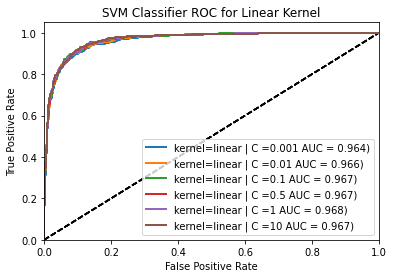

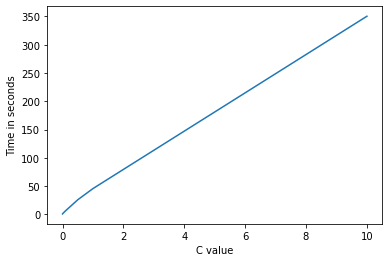

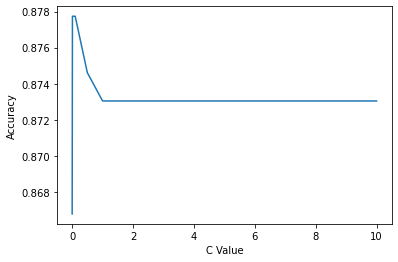

In [81]:
C = [0.001,0.01,0.1,0.5,1,10]
time_list=[]
accuracy=[]
for c in C:
    fpr, tpr, roc_auc,acc,t= SVM_Classification2(kernel='linear',C=c)
    time_list.append(t)
    accuracy.append(acc)
    #GRAPH DATA
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1],linestyle='--',color='black')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('SVM Classifier ROC for Linear Kernel')
    plt.plot(fpr, tpr, lw=2, label='kernel=linear | C ='+str(c)+' AUC = %0.3f)'%roc_auc)
    plt.legend(loc="lower right")

plt.show()

plt.plot(C,time_list)
plt.xlabel("C value")
plt.ylabel("Time in seconds")
plt.show()

plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.plot(C,accuracy)
plt.show()

# SVM with Polynomial kernel 

Accuracy of SVM Classification with  poly  kernel :  0.8909774436090225
--- 0.7917788028717041 seconds ---
Accuracy of SVM Classification with  poly  kernel :  0.8740601503759399
--- 0.6901130676269531 seconds ---
Accuracy of SVM Classification with  poly  kernel :  0.8984962406015038
--- 0.608043909072876 seconds ---
Accuracy of SVM Classification with  poly  kernel :  0.881578947368421
--- 0.6760618686676025 seconds ---
Accuracy of SVM Classification with  poly  kernel :  0.9022556390977443
--- 0.6763472557067871 seconds ---
Accuracy of SVM Classification with  poly  kernel :  0.8796992481203008
--- 0.7633788585662842 seconds ---


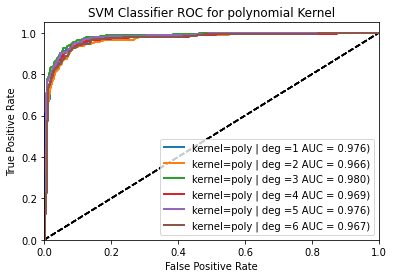

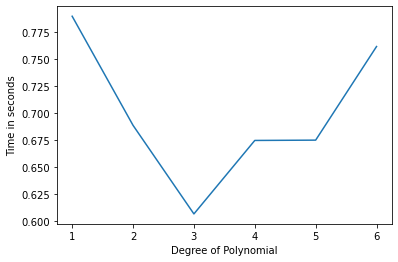

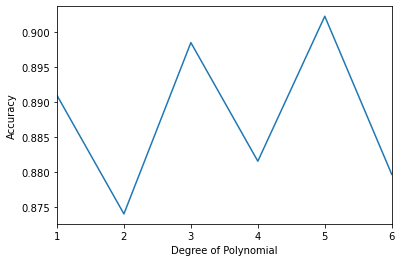

In [167]:
deg = [1,2,3,4,5,6]
time_list=[]
accuracy=[]
for d in deg:
    fpr, tpr, roc_auc,acc,t= SVM_Classification2(kernel='poly',degree=d)
    time_list.append(t)
    accuracy.append(acc)
    #GRAPH DATA
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1],linestyle='--',color='black')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('SVM Classifier ROC for polynomial Kernel')
    plt.plot(fpr, tpr, lw=2, label='kernel=poly | deg ='+str(d)+' AUC = %0.3f)'%roc_auc)
    plt.legend(loc="lower right")

plt.show()

plt.plot(deg,time_list)
plt.xlabel("Degree of Polynomial")
plt.ylabel("Time in seconds")
plt.show()

plt.xlabel('Degree of Polynomial')
plt.ylabel('Accuracy')
plt.xlim([1, 6])
#plt.ylim([0.8, 1.00])
plt.plot(deg,accuracy)
plt.show()

# SVM with RBF kernel

Accuracy of SVM Classification with  rbf  kernel :  0.774294670846395
--- 0.9738752841949463 seconds ---
Accuracy of SVM Classification with  rbf  kernel :  0.774294670846395
--- 1.3083772659301758 seconds ---
Accuracy of SVM Classification with  rbf  kernel :  0.7758620689655172
--- 1.2311410903930664 seconds ---
Accuracy of SVM Classification with  rbf  kernel :  0.8181818181818182
--- 1.2753901481628418 seconds ---
Accuracy of SVM Classification with  rbf  kernel :  0.8369905956112853
--- 1.0685031414031982 seconds ---
Accuracy of SVM Classification with  rbf  kernel :  0.877742946708464
--- 1.171600103378296 seconds ---
Accuracy of SVM Classification with  rbf  kernel :  0.8887147335423198
--- 1.1768748760223389 seconds ---
Accuracy of SVM Classification with  rbf  kernel :  0.8934169278996865
--- 1.05367112159729 seconds ---


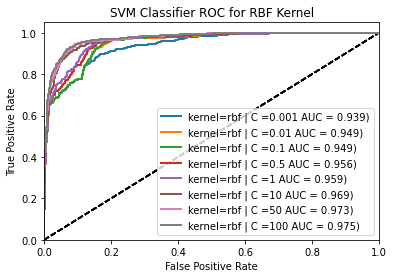

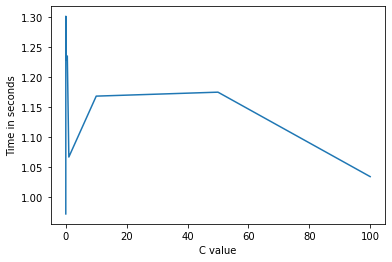

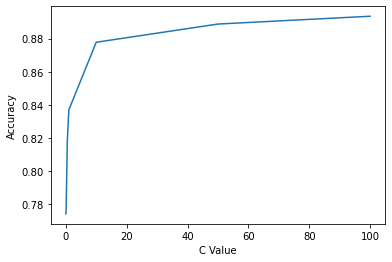

In [82]:
C = [0.001,0.01,0.1,0.5,1,10,50,100]
time_list=[]
accuracy=[]
for c in C:
    fpr, tpr, roc_auc,acc,t= SVM_Classification2(kernel='rbf',C=c)
    time_list.append(t)
    accuracy.append(acc)
    #GRAPH DATA
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1],linestyle='--',color='black')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('SVM Classifier ROC for RBF Kernel')
    plt.plot(fpr, tpr, lw=2, label='kernel=rbf | C ='+str(c)+' AUC = %0.3f)'%roc_auc)
    plt.legend(loc="lower right")

plt.show()

plt.plot(C,time_list)
plt.xlabel("C value")
plt.ylabel("Time in seconds")
plt.show()

plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.plot(C,accuracy)
plt.show()

# SVM with the best model parameters

Accuracy of SVM Classification with  linear  kernel :  0.877742946708464
--- 1.4142379760742188 seconds ---
Accuracy of SVM Classification with  poly  kernel :  0.8636363636363636
--- 1.2982442378997803 seconds ---
Accuracy of SVM Classification with  rbf  kernel :  0.8934169278996865
--- 0.8472342491149902 seconds ---


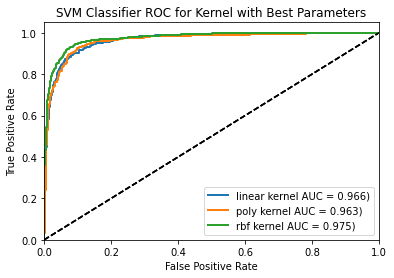

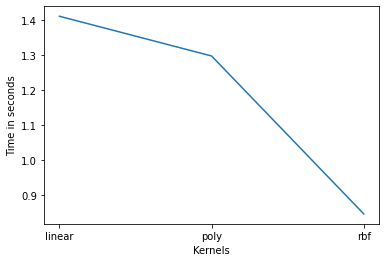

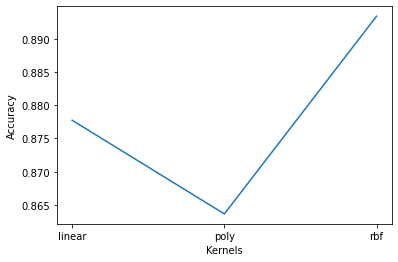

In [83]:
kernel = ['linear','poly','rbf']
time_list=[]
accuracy=[]
for k in kernel:
    if(k == 'linear'):
        fpr, tpr, roc_auc,acc,t= SVM_Classification2(kernel=k,C=0.01)
        time_list.append(t)
        accuracy.append(acc)
        plt.plot(fpr, tpr, lw=2, label=k+' kernel AUC = %0.3f)'%roc_auc)
    elif(k == 'poly'):
        fpr, tpr, roc_auc,acc,t= SVM_Classification2(kernel=k,degree=5)
        time_list.append(t)
        accuracy.append(acc)
        plt.plot(fpr, tpr, lw=2, label=k+' kernel AUC = %0.3f)'%roc_auc)
    elif(k == 'rbf'):
        fpr, tpr, roc_auc,acc,t= SVM_Classification2(kernel=k,C=100)
        time_list.append(t)
        accuracy.append(acc)
        plt.plot(fpr, tpr, lw=2, label=k+' kernel AUC = %0.3f)'%roc_auc)
    #GRAPH DATA
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1],linestyle='--',color='black')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('SVM Classifier ROC for Kernel with Best Parameters')
    #plt.plot(fpr, tpr, lw=2, label='kernel AUC = %0.3f)'%roc_auc)
    plt.legend(loc="lower right")

plt.show()

plt.plot(kernel,time_list)
plt.xlabel("Kernels")
plt.ylabel("Time in seconds")
plt.show()

plt.xlabel('Kernels')
plt.ylabel('Accuracy')
plt.plot(kernel,accuracy)
plt.show()

# Cross Validation

In [84]:
# Applying Feature Scaling for Features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X) #applying on all features

Mean Accuracy for C-Value 0.001 :  0.7784657631322526
Mean Accuracy for C-Value 0.01 :  0.7784657631322526
Mean Accuracy for C-Value 0.1 :  0.8471122331473115
Mean Accuracy for C-Value 1 :  0.8611856674639029
Mean Accuracy for C-Value 10 :  0.8531645849942422
Mean Accuracy for C-Value 100 :  0.8460913278412614


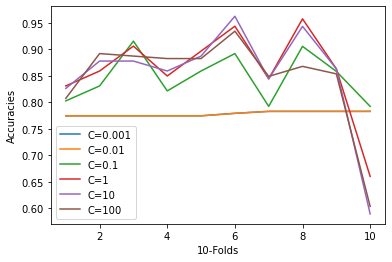

In [85]:
c_value=[0.001,0.01,0.1,1,10,100]
cv=list(range(1,11))
i=0
mscores = []
for c in c_value:
    poly = SVC(kernel='rbf',random_state=7,C=c)
    scores = cross_val_score(poly,x,Y,cv=10,scoring="accuracy")
    
    plt.plot(cv,scores,label="C="+str(c))
    plt.xlabel("10-Folds")
    plt.ylabel("Accuracies")
    plt.legend()
    i+=1
    print("Mean Accuracy for C-Value "+str(c)+" : ",scores.mean())
    mscores.append(scores.mean())
#plt.plot(cv, mscores, label="Mean Accuracy")
plt.show()

In [87]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.svm import SVC
poly = SVC(kernel='rbf',random_state=0,C=0.1)
scores = cross_val_score(poly,x,Y,cv=10,scoring="accuracy")
scores.mean()

0.8471122331473115

# Decision Tree

In [88]:
X = data.iloc[:,:-1].values
Y = data.iloc[:, -1].values
#Splitting data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =  train_test_split(X,Y,test_size=0.3,random_state=0)

In [89]:
from sklearn.tree import DecisionTreeClassifier

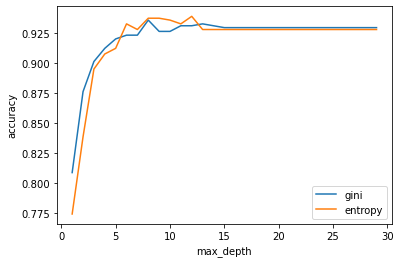

In [90]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
    dtree = DecisionTreeClassifier(criterion='gini', max_depth=i,random_state=0)
    dtree.fit(X_train,Y_train)
    pred = dtree.predict(X_test)
    acc_gini.append(accuracy_score(Y_test, pred))
    ####
    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i,random_state=0)
    dtree.fit(X_train, Y_train)
    pred = dtree.predict(X_test)
    acc_entropy.append(accuracy_score(Y_test, pred))
    ####
    max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini),'acc_entropy':pd.Series(acc_entropy),'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [94]:
# From the above plot depth = 10 looks like a good metric with gene index
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=12,random_state=0)
dtree.fit(X_train,Y_train)
pred = dtree.predict(X_test)
accuracy_score(Y_test, pred)

0.9388714733542319

# Cross Validation

In [95]:
from sklearn.model_selection import cross_val_score, cross_val_predict

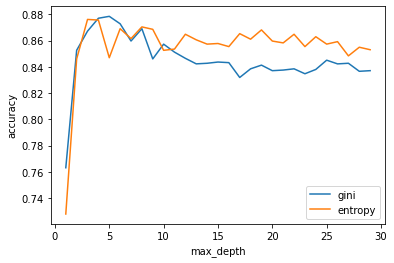

In [101]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
    dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
    scores_g = cross_val_score(dtree,X,Y,cv=10,scoring="accuracy")
    acc_gini.append(scores_g.mean())
    ####
    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    scores_e = cross_val_score(dtree,X,Y,cv=10,scoring="accuracy")
    acc_entropy.append(scores_e.mean())
    ####
    max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini),'acc_entropy':pd.Series(acc_entropy),'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [102]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=5,random_state=100)
scores = cross_val_score(tree,X,Y,cv=10,scoring="accuracy")
scores.mean()

0.8766631233944547

In [106]:
# on training and testing data
clf = DecisionTreeClassifier(criterion='gini', max_depth=5,random_state=100)
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.9200626959247649

# AdaBoost

In [103]:
X = data.iloc[:,:-1].values
Y = data.iloc[:, -1].values
#Splitting data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =  train_test_split(X,Y,test_size=0.3,random_state=0)

In [104]:
from sklearn.ensemble import AdaBoostClassifier

In [109]:
clf = AdaBoostClassifier(n_estimators=50)
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.8793103448275862

# Cross Validation-Adaboost

[0.7707281424395429, 0.8414496412436886, 0.8682434228009566, 0.8081118788200904, 0.11821684825936754]


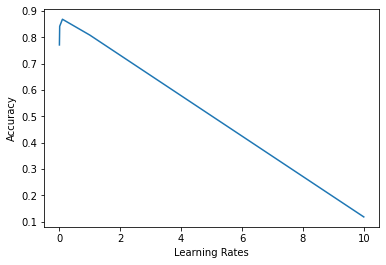

In [112]:
learningrate = [0.001,0.01,0.1,1,10]
accuracy=[]
for r in learningrate:
    clf = AdaBoostClassifier(n_estimators=300, random_state=0,learning_rate=r)
    scores = cross_val_score(clf,X,Y,cv=10,scoring="accuracy")
    accuracy.append(scores.mean())

print(accuracy)
plt.xlabel('Learning Rates')
plt.ylabel('Accuracy')
plt.plot(learningrate,accuracy)
plt.show()

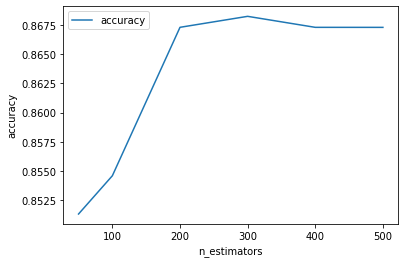

In [111]:
accuracy=[]
estimators=[50,100,200,300,400,500]
for n in estimators:
    boost = AdaBoostClassifier(n_estimators=n, random_state=0, learning_rate=0.1)
    scores_g = cross_val_score(boost,X,Y,cv=10,scoring="accuracy")
    accuracy.append(scores_g.mean())
    
plt.plot(estimators,accuracy,label='accuracy')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.legend()

In [113]:
# Cross Validation Accuracy
clf = AdaBoostClassifier(n_estimators=300, random_state=0, learning_rate=0.1)
scores = cross_val_score(clf,X,Y,cv=10,scoring="accuracy")
scores.mean()

0.8682434228009566